# Úkoly
## Profilování a benchmarking
- pomocí `line_profiler` zjistěte, které části kódu jsou nejvíce výpočetně náročné
    - pro `eps = 1e-100`
- proveďtě benchmarking pomocí `time.time` pro `archimedes_pi` a `newton_pi` pro různé hodnoty `eps`
    - `eps = 1e-1, 1e-2, 1e-3,  ... , 1e-100`
    - výsledky zobrazte pomocí log-log grafu    

In [7]:
from decimal import Decimal as D, getcontext

getcontext().prec = 1000
pi = D("3.141592653589793238462643383279\
5028841971693993\
7510582097494459230781640628620899862803482534\
2117067982148086513282306647093844609550582231\
7253594081284811174502841027019385211055596446\
2294895493038196442881097566593344612847564823\
3786783165271201909145648566923460348610454326\
6482133936072602491412737245870066063155881748\
8152092096282925409171536436789259036001133053\
0548820466521384146951941511609433057270365759\
5919530921861173819326117931051185480744623799\
6274956735188575272489122793818301194912983367\
3362440656643086021394946395224737190702179860\
9437027705392171762931767523846748184676694051\
3200056812714526356082778577134275778960917363\
7178721468440901224953430146549585371050792279\
6892589235420199561121290219608640344181598136\
2977477130996051870721134999999837297804995105\
9731732816096318595024459455346908302642522308\
2533446850352619311881710100031378387528865875\
3320838142061717766914730359825349042875546873\
1159562863882353787593751957781857780532171226\
806613001927876611195909216420199")

def odmocnina(a, eps):
    x = a
    while abs(x**2 - a) > eps**2:
        x = (a / x + x) / 2
    return x


def archimedes_pi(eps):
    vyska = odmocnina(D(1) - (D(1) / D(2))**2, eps)
    zakladna = D(1)
    i = 1
    while True:
        zakladna = odmocnina((zakladna / 2)**2 + (1 - vyska)**2, eps)
        vyska = odmocnina(1 - (zakladna / 2)**2, eps)
        odhad_pi = 6 * (2**i) * zakladna * (vyska / 2)
        i += 1
        if abs(odhad_pi - pi) < eps:
            break
    return odhad_pi


def newton_pi(eps):
    a = D(0.5) * (D(1) / (2**3))
    pi_suma = D(1 / D(2 * 1 + 1)) * a
    pi_zbytek = ((-1) * odmocnina(D(3), eps)) / D(8) + D(1) / D(2)
    i = D(2)
    while True:
        a *= (D(2 * i - 3) / D(2 * i)) * D(1 / 4)
        pi_suma += (D(1) / D(2 * i + 1)) * a
        odhad_pi = 12 * (pi_zbytek - pi_suma)
        if abs(odhad_pi - pi) < eps:
            break
        i += 1
    return odhad_pi

eps = 1e-100
pi_odhad1 = archimedes_pi(eps)
pi_odhad2 = newton_pi(eps)

print(f"Pi podle Archimedova algoritmu s chybou {abs(pi - pi_odhad1):.4e}")
print(f"Pi podle Newtonova algoritmu s chybou {abs(pi - pi_odhad2):.4e}")

Pi podle Archimedova algoritmu s chybou 6.5629e-101
Pi podle Newtonova algoritmu s chybou 2.6776e-101


In [8]:
%load_ext line_profiler

In [9]:
%lprun -u 1e-6 -f archimedes_pi archimedes_pi(1e-100)

Timer unit: 1e-06 s

Total time: 0.807665 s
File: /tmp/ipykernel_7216/1158795140.py
Function: archimedes_pi at line 35

Line #      Hits         Time  Per Hit   % Time  Line Contents
    35                                           def archimedes_pi(eps):
    36         1       2544.1   2544.1      0.3      vyska = odmocnina(D(1) - (D(1) / D(2))**2, eps)
    37         1          4.2      4.2      0.0      zakladna = D(1)
    38         1          0.6      0.6      0.0      i = 1
    39       166         55.0      0.3      0.0      while True:
    40       166     762585.5   4593.9     94.4          zakladna = odmocnina((zakladna / 2)**2 + (1 - vyska)**2, eps)
    41       166      37834.8    227.9      4.7          vyska = odmocnina(1 - (zakladna / 2)**2, eps)
    42       166       3996.9     24.1      0.5          odhad_pi = 6 * (2**i) * zakladna * (vyska / 2)
    43       166         66.8      0.4      0.0          i += 1
    44       166        576.9      3.5      0.1          if 

**Obdobně postupujte pro tyto funkce hledající prvočísla menší než `n`**
- pomocí profilování zjistěte, které části kódu jsou nejvíce výpočetně náročné
- proveďtě benchmarking pomocí `time.time` pro `eratosthenes_sieve` a `primes_test` pro různé hodnoty `n`
    - `n = 10, 100, 1000,  ... , 1000000`
    - výsledky zobrazte pomocí log-log grafu

In [10]:
import numpy as np

def eratosthenes_sieve(n):
    sieve = np.arange(1, n + 1)
    sieve[0] = 0
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i - 1] != 0:
            sieve[i**2 - 1:n:i] = 0
    return np.where(sieve)[0] + 1

def primes_test(n):
    primes = [2]
    i = 3
    while i < n:
        for p in primes:
            if i % p == 0:
                break
            if p > np.sqrt(i):
                primes.append(i)
                break
        i += 2
    return np.array(primes)

n = 1000
print(eratosthenes_sieve(n))
print(primes_test(n))

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 

In [54]:
from time import time

n = [int(1.2**i) for i in range(1, 60)]
er_raw = []
pr_raw = []
opakovani = 10

for _ in range(opakovani):
    for i in n:
        t = time()
        eratosthenes_sieve(i)
        er_raw.append(time() - t)

        t = time()
        primes_test(i)
        pr_raw.append(time() - t)

er = []
pr = []

for i in range(len(n)):
    er.append(sum(er_raw[i::len(n)]) / opakovani)
    pr.append(sum(pr_raw[i::len(n)]) / opakovani)

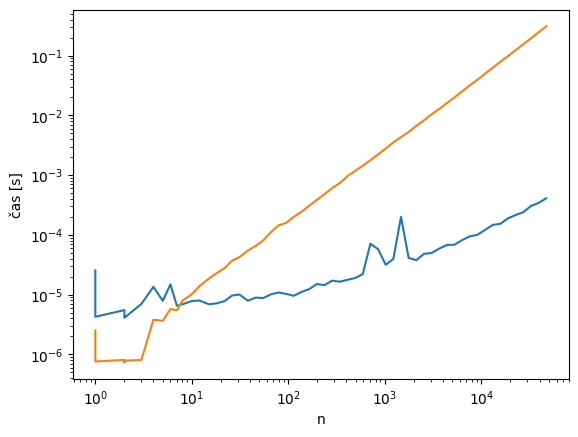

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("čas [s]")
plt.plot(n, er)
plt.plot(n, pr)
plt.show()

## Numba

1. Použijte Numbu pro zrychlení hledání prvočísel (obě funkce), porovnejte časy s původními funkcemi, proveďte benchmarking podobně jako v předchozím případě

In [48]:
import numba

numba_eratosthenes = numba.jit(eratosthenes_sieve)
numba_primes = numba.jit(primes_test)

In [49]:
from time import time

n = [int(1.2**i) for i in range(1, 60)]
er_raw = []
pr_raw = []
opakovani = 10

for _ in range(opakovani):
    for i in n:
        t = time()
        numba_eratosthenes(i)
        er_raw.append(time() - t)

        t = time()
        numba_primes(i)
        pr_raw.append(time() - t)

er = []
pr = []

for i in range(len(n)):
    er.append(sum(er_raw[i::len(n)]) / opakovani)
    pr.append(sum(pr_raw[i::len(n)]) / opakovani)

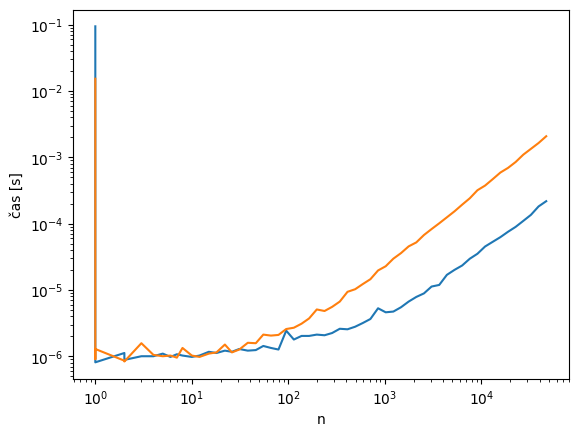

In [50]:
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("čas [s]")
plt.plot(n, er)
plt.plot(n, pr)
plt.show()

2. Použijte Numba.stencil pro aproximaci difuze 2D pole v čase
    - difuzní kernel bude počítat změny v hodnotách na základě rozdílů v okolních buňkách 
    $$u_{i,j} = u_{i,j} + \frac{\lambda}{\delta_t}\sum_{k,l \in \{(i,j-1), (i-1,j),\ldots\}} u_{k,l} - u_{i,j}$$

In [81]:
import numpy as np
from numba import stencil, jit
import matplotlib.pyplot as plt


lam = 1e-1
delta_t = 1

# Initialize the grid
N = 100  # Size of the grid (NxN)
grid = np.zeros((N, N))
grid[N // 2, N // 2] = 1000  # Initial concentration in the center
grid[N // 4, 3*N // 4] = 1000
grid[N // 4, N // 4] = 1000
grid[3*N // 4, 3*N // 4] = 1000
grid[3*N // 4, N // 4] = 1000

# TODO: naimplementujte funkci, která provede jeden krok difuze

def diffusing(grid):
    @stencil
    def diffuse_step(grid):
        s = sum([grid[1, 0], grid[-1, 0], grid[0, 1], grid[0, -1]]) - 4 * grid[0, 0]
        return grid[0, 0] + lam/delta_t * s
    return diffuse_step(grid)

diffuse_jit = jit(diffusing)

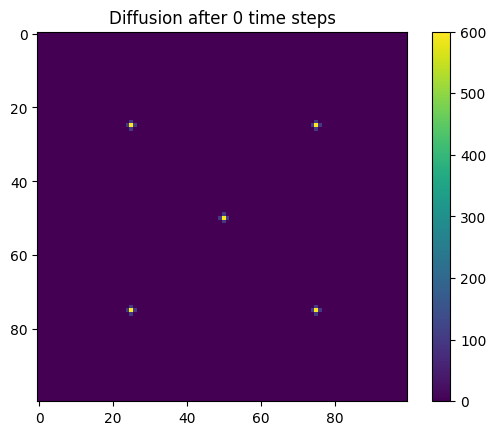

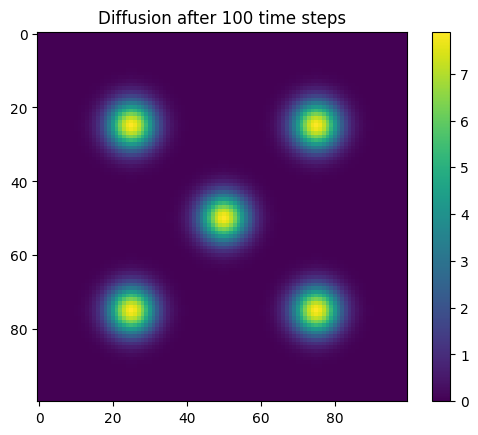

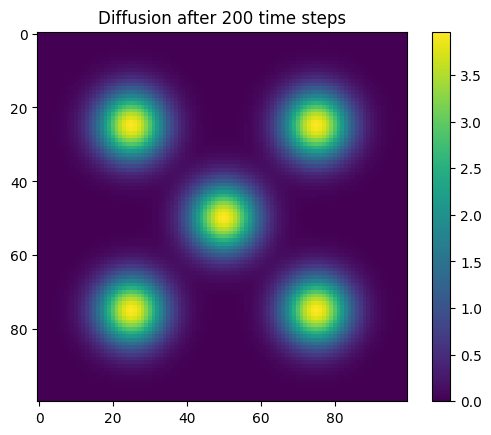

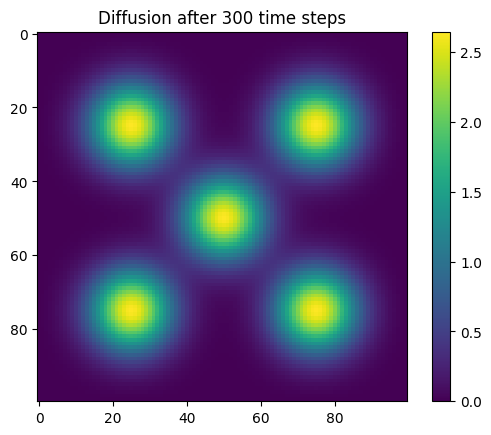

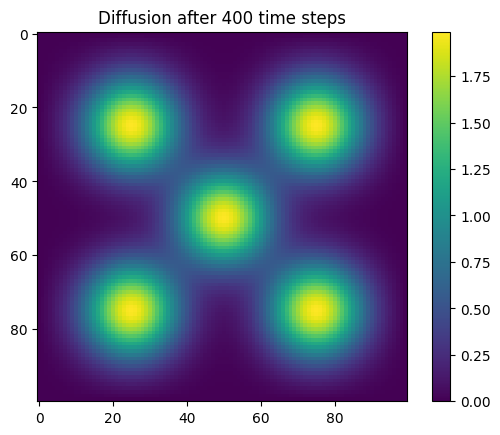

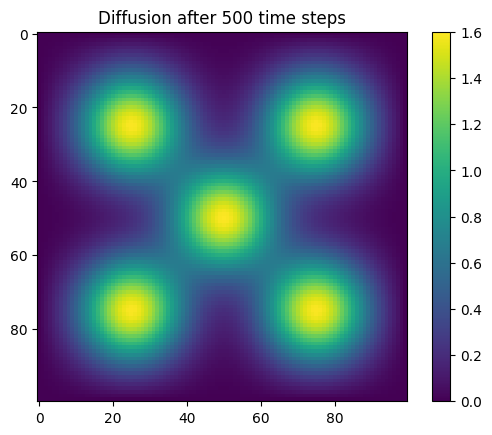

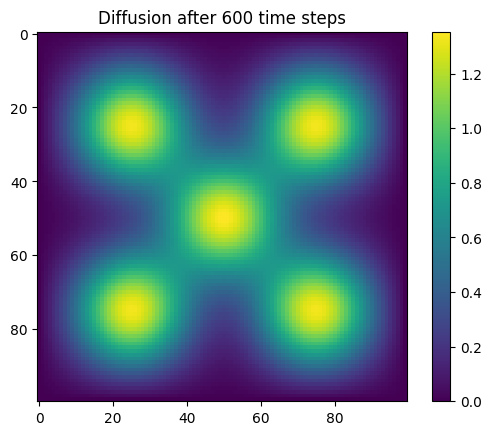

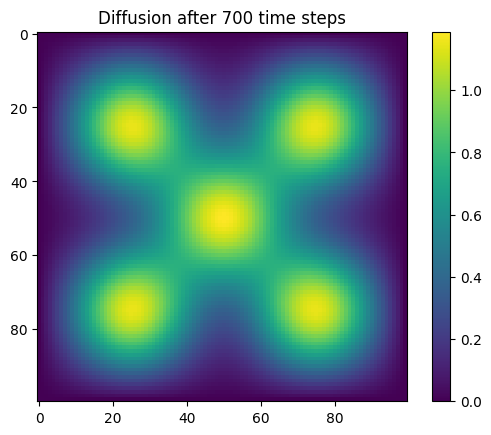

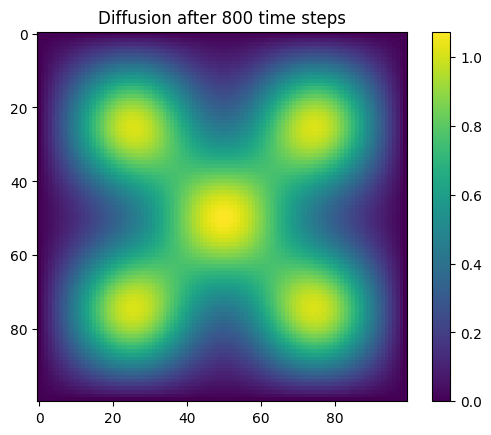

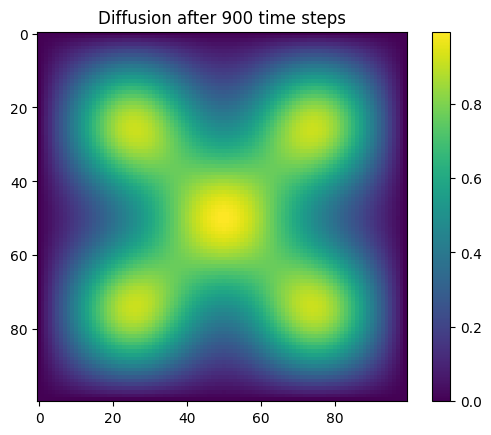

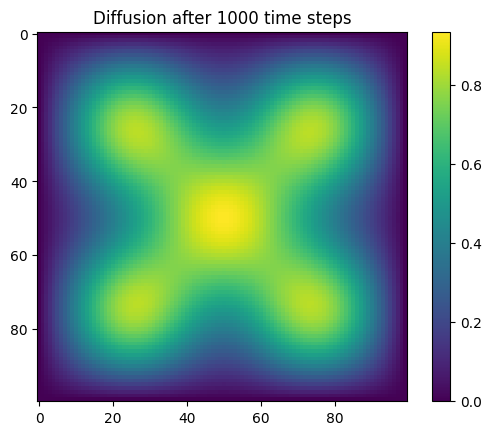

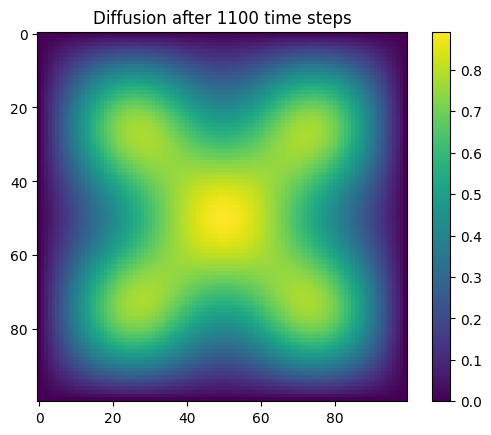

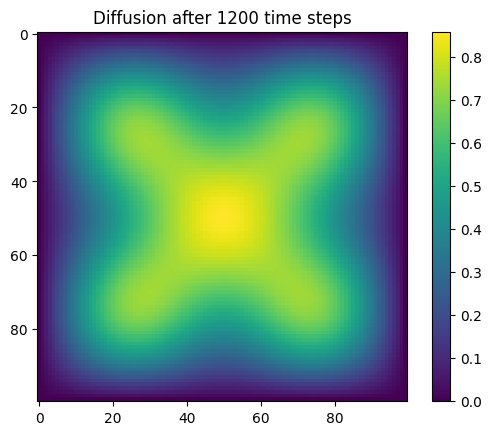

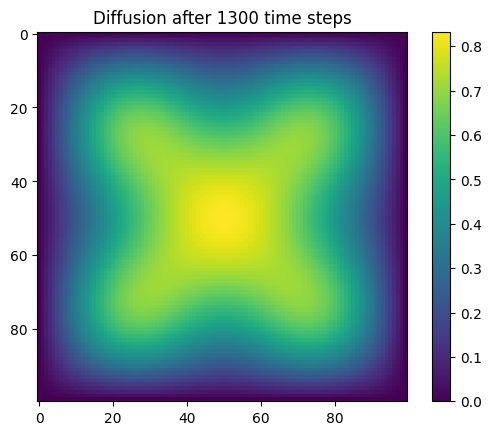

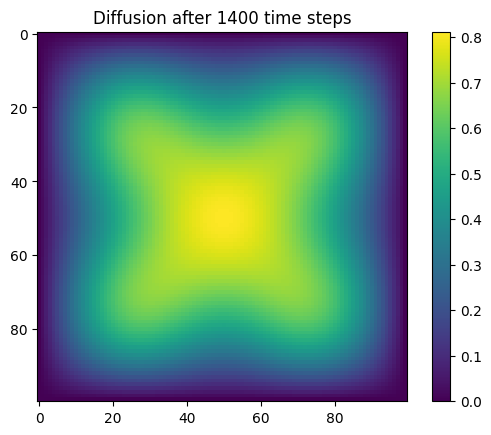

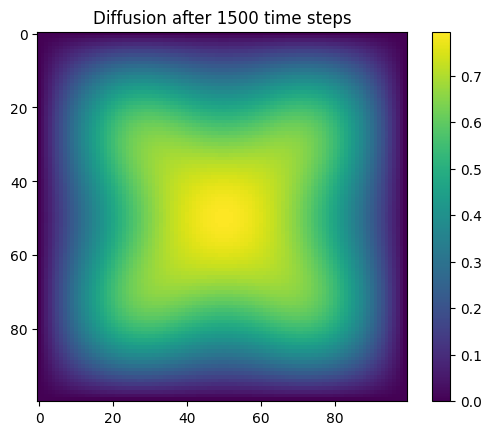

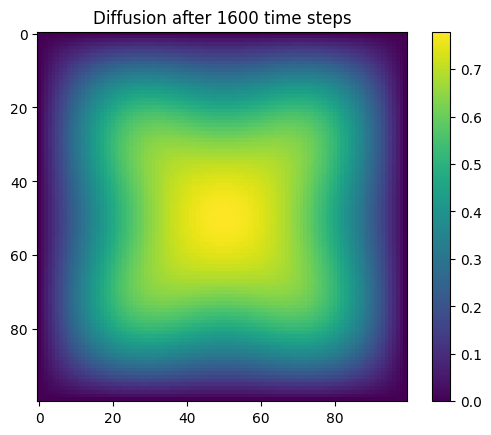

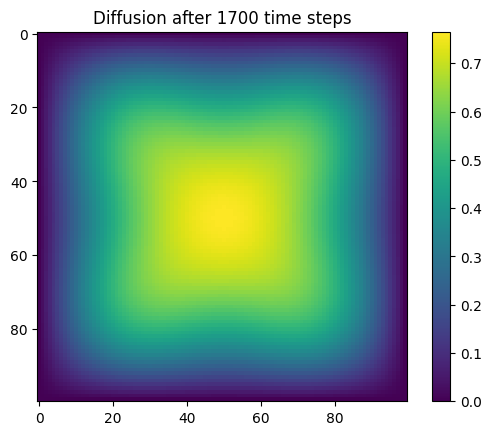

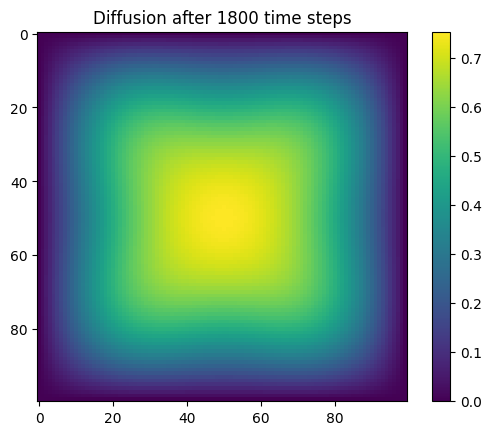

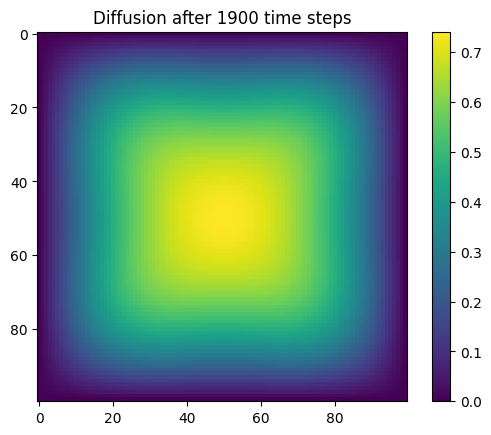

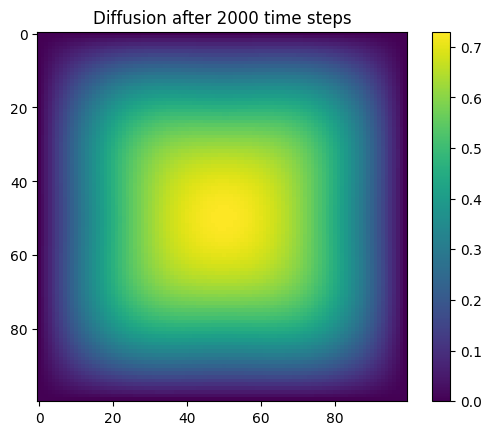

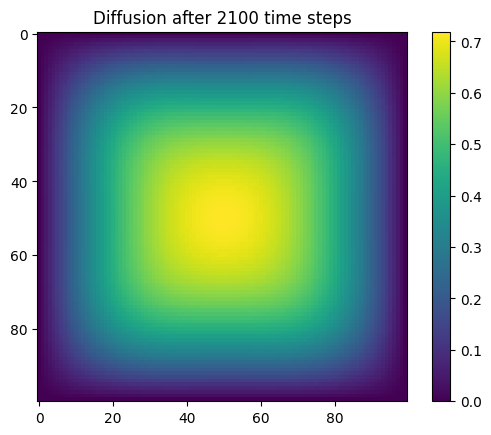

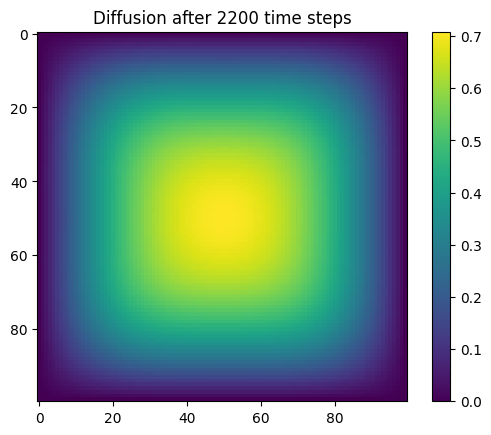

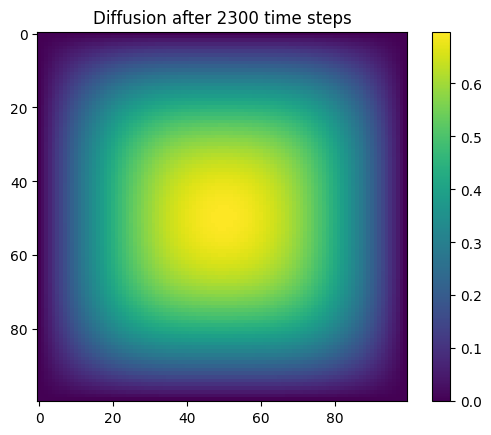

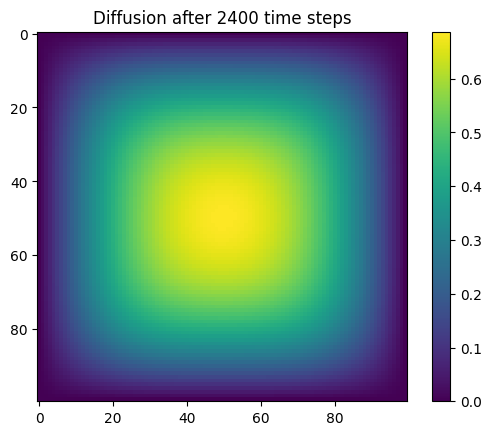

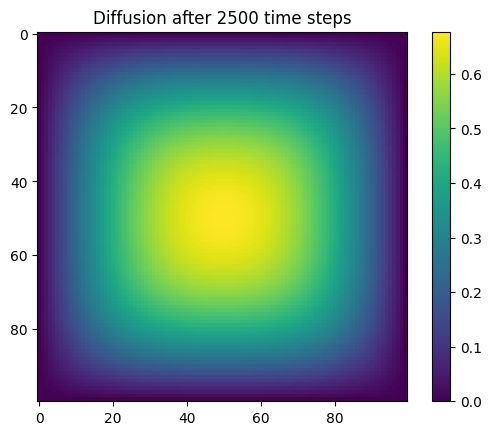

In [82]:
def diffuse(grid, num_steps):
    for time_step in range(num_steps+1):
        grid = diffuse_jit(grid)
        if time_step % 100 == 0:
            # Plotting the result
            plt.imshow(grid)
            plt.colorbar()
            plt.title(f'Diffusion after {time_step} time steps')
            plt.show()
    return grid


# Simulate diffusion
num_steps = 2500
result = diffuse(grid, num_steps)